# This notebook extracts the top differential TE and genes comparing turner's TJP2 KO and WT organoids 

## goal
- checking if the KO group shows upregulation of TE more than WT
- confirm upregulated genes make senses
- check the identity of upregulated TEs and compare with human SER vs AD


## import

In [3]:
# import packages
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import seaborn as sn
from matplotlib import pyplot as plt

In [4]:
sys.path.append("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/")
import zc_volcano

In [5]:
import warnings
warnings.filterwarnings( 'ignore' )

## load Deseq output data

In [6]:
dge = pd.read_csv("./Deseq_indiv_locus_results.csv" , header = 0, index_col= 0 )
dge.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
transcript_id,,,,,,,,,,,
(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
(A)n_17,72.183100,-0.273901,0.190399,-1.438564,0.150274,0.540315,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
(A)n_18,113.898323,-0.033522,0.146842,-0.228286,0.819424,0.954895,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
(A)n_19,184.535379,0.079692,0.117803,0.676481,0.498735,0.831150,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [7]:
dge.reset_index( inplace=True, names= 'transcript_id' )

In [9]:
dge.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
2,(A)n_17,72.183100,-0.273901,0.190399,-1.438564,0.150274,0.540315,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
3,(A)n_18,113.898323,-0.033522,0.146842,-0.228286,0.819424,0.954895,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
4,(A)n_19,184.535379,0.079692,0.117803,0.676481,0.498735,0.831150,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [10]:
#indiv_te_count.shape

In [11]:
subf_dge = pd.read_csv("./Deseq_subF_results.csv", header = 0, index_col = 0 )

In [12]:
subf_dge.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
repName,,,,,,,,,
(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


In [13]:
subf_dge.tail()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
repName,,,,,,,,,
tRNA-Thr-ACY,0.511338,1.384413,2.365470,0.585259,0.558373,NaN,tRNA,tRNA,tRNA-Thr-ACY|tRNA
tRNA-Trp-TGG,2.440514,0.679921,1.081383,0.628751,0.529512,NaN,tRNA,tRNA,tRNA-Trp-TGG|tRNA
tRNA-Tyr-TAC,1.817469,-1.347132,1.275400,-1.056243,0.290857,NaN,tRNA,tRNA,tRNA-Tyr-TAC|tRNA
tRNA-Val-GTA,0.726566,0.170878,2.130787,0.080195,0.936082,NaN,tRNA,tRNA,tRNA-Val-GTA|tRNA
tRNA-Val-GTY,0.365590,-1.959264,3.144820,-0.623013,0.533276,NaN,tRNA,tRNA,tRNA-Val-GTY|tRNA


In [14]:
subf_dge.reset_index( inplace=True, names= 'repName' )

## load annotation table

In [15]:
rmsk = pd.read_csv("./mm39_rmsk_full.tsv", header = 0, index_col = None, delimiter='\t' )
rmsk.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,1,3777,194,105,11,chr1,8387806,8388657,-186765622,+,Lx2B2,LINE,L1,5997,7041,-8,7
1,1,595,269,47,47,chr1,41942994,41943142,-153211137,+,B3,SINE,B2,4,151,-65,6
2,1,1796,281,48,69,chr1,50331618,50332377,-144821902,-,Lx7,LINE,L1,-1163,6533,5801,7
3,1,5180,80,29,11,chr1,58720077,58721182,-136433097,+,L1MdV_III,LINE,L1,681,1770,-2002,8
4,2,1316,273,85,19,chr1,100663164,100663479,-94490800,+,MLTR14,LTR,ERV1,161,505,-38,1


In [16]:
rmsk['transcript_id'] = rmsk['repName'] + '_' + rmsk['swScore'].astype(str)

In [17]:
rmsk.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,transcript_id
0,1,3777,194,105,11,chr1,8387806,8388657,-186765622,+,Lx2B2,LINE,L1,5997,7041,-8,7,Lx2B2_3777
1,1,595,269,47,47,chr1,41942994,41943142,-153211137,+,B3,SINE,B2,4,151,-65,6,B3_595
2,1,1796,281,48,69,chr1,50331618,50332377,-144821902,-,Lx7,LINE,L1,-1163,6533,5801,7,Lx7_1796
3,1,5180,80,29,11,chr1,58720077,58721182,-136433097,+,L1MdV_III,LINE,L1,681,1770,-2002,8,L1MdV_III_5180
4,2,1316,273,85,19,chr1,100663164,100663479,-94490800,+,MLTR14,LTR,ERV1,161,505,-38,1,MLTR14_1316


In [18]:
rmsk.columns

Index(['#bin', 'swScore', 'milliDiv', 'milliDel', 'milliIns', 'genoName',
       'genoStart', 'genoEnd', 'genoLeft', 'strand', 'repName', 'repClass',
       'repFamily', 'repStart', 'repEnd', 'repLeft', 'id', 'transcript_id'],
      dtype='object')

## add fam and class info to the dge dfs

In [19]:
mapping_df = rmsk[['repName', 'repClass',  'repFamily', 'transcript_id']]

In [20]:
mapping_df.drop_duplicates( inplace= True)
mapping_df.shape

(860058, 4)

In [21]:
# make mapping dicts
id_to_class = dict( zip( mapping_df['transcript_id'] , mapping_df['repClass'] ))
id_to_fam = dict( zip( mapping_df['transcript_id'] , mapping_df['repFamily'] ))

In [22]:
id_to_name = dict( zip( mapping_df['transcript_id'] , mapping_df['repName'] ))

In [23]:
name_to_class = dict( zip( mapping_df['repName'] , mapping_df['repClass'] ))
name_to_fam = dict( zip( mapping_df['repName'] , mapping_df['repFamily'] ))

In [25]:
dge.head(2)

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [26]:
dge[dge['transcript_id'] == '__no_feature']

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class


In [27]:
dge.drop( 186461, axis = 0 , inplace= True)

In [28]:
dge['repClass'] = [ id_to_class[k] for k in dge['transcript_id'] ]
dge['repFamily'] = [ id_to_fam[k] for k in dge['transcript_id'] ]

In [29]:
dge['repName'] = [ id_to_name[k] for k in dge['transcript_id'] ]

In [30]:
dge['name_fam'] = dge['repName'] + '|' + dge['repFamily']

In [31]:
dge['name_fam_class'] = dge['repName'] + '|' + dge['repFamily'] + '|' + dge['repClass']

In [32]:
subf_dge.head()

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
0,(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
1,(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
2,(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
3,(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
4,(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


In [33]:
subf_dge[subf_dge['repName'] == '__no' ]

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class


In [34]:
subf_dge.drop( 5890, inplace = True, axis = 0 )

In [35]:
subf_dge['repClass'] = [ name_to_class[k] for k in subf_dge['repName'] ]
subf_dge['repFamily'] = [ name_to_fam[k] for k in subf_dge['repName'] ]

In [36]:
subf_dge['name_class'] = subf_dge['repName'] + '|' + subf_dge['repClass' ]

In [38]:
dge.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
2,(A)n_17,72.183100,-0.273901,0.190399,-1.438564,0.150274,0.540315,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
3,(A)n_18,113.898323,-0.033522,0.146842,-0.228286,0.819424,0.954895,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
4,(A)n_19,184.535379,0.079692,0.117803,0.676481,0.498735,0.831150,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [39]:
subf_dge.head()

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
0,(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
1,(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
2,(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
3,(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
4,(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


In [40]:
dge['repClass'].value_counts()

repClass
LTR               67859
LINE              62721
SINE              21606
Simple_repeat     20512
DNA                9511
Satellite           998
Retroposon          923
Unknown             912
scRNA               433
Low_complexity      413
snRNA               366
tRNA                244
rRNA                168
srpRNA               80
Unspecified          14
RC                   13
Name: count, dtype: int64

In [59]:
dge_relevant = dge[ ~ np.isin( dge['repClass'], ['Unknown' ,'Simple_repeat' , 'Unspecified' , 'RC' ] ) ] 

In [60]:
subf_dge_revelant = subf_dge[ ~ np.isin( subf_dge['repClass'], ['Unknown' ,'Simple_repeat' , 'Unspecified' , 'RC' ] ) ] 

## Analysis for individual loci level

### get volcano plots of TE and gene
 - individual TE and subF level

<font color = plum>Large LFC plot

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


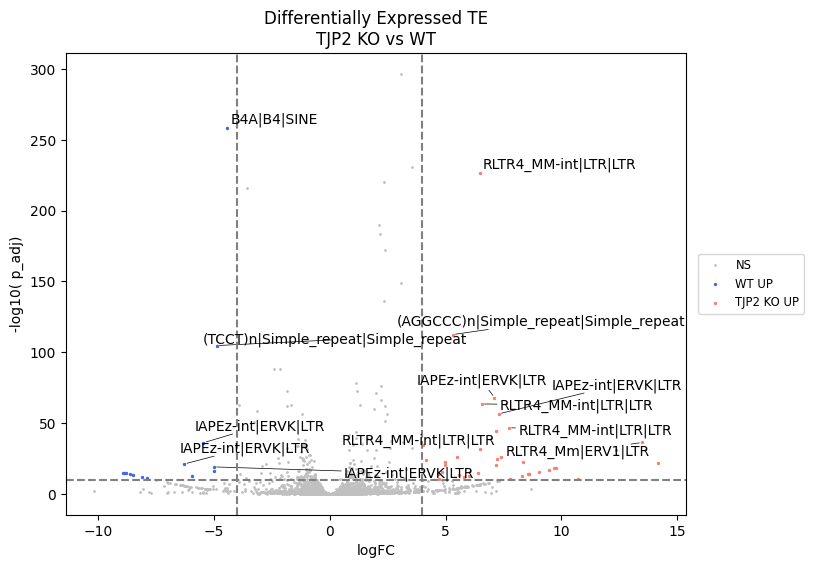

In [43]:
f1, a1 = zc_volcano.dge_vocano_plot( df = dge, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE\nTJP2 KO vs WT', 
                    up_lfc_thresh = 4, down_lfc_thresh = -4, pval_thresh = 1e-10, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 8, num_label_top_down = 8, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_fam_class' )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


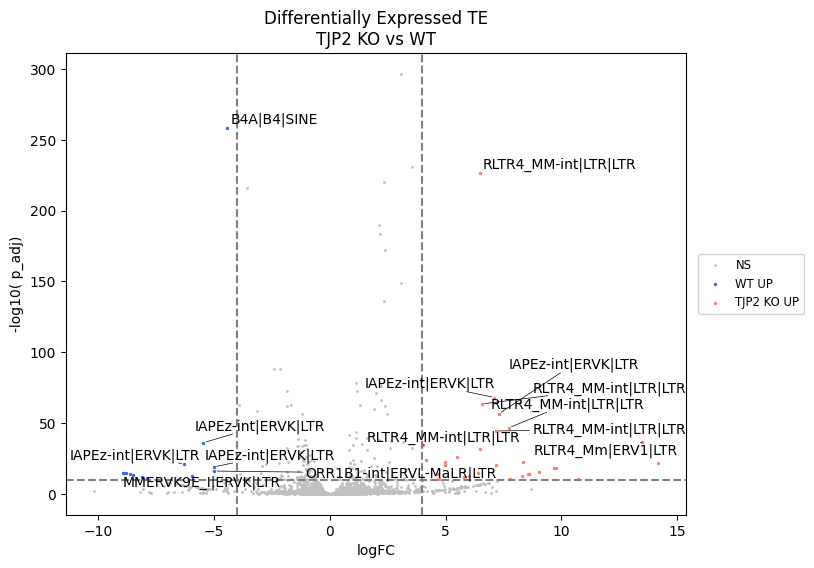

In [56]:

f1, a1 = zc_volcano.dge_vocano_plot( df = dge_relevant, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE\nTJP2 KO vs WT', 
                    up_lfc_thresh = 4, down_lfc_thresh = -4, pval_thresh = 1e-10, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 8, num_label_top_down = 8, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_fam_class' )

<font color = plum>Smaller LFC threshold but with more TEs having high pval

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


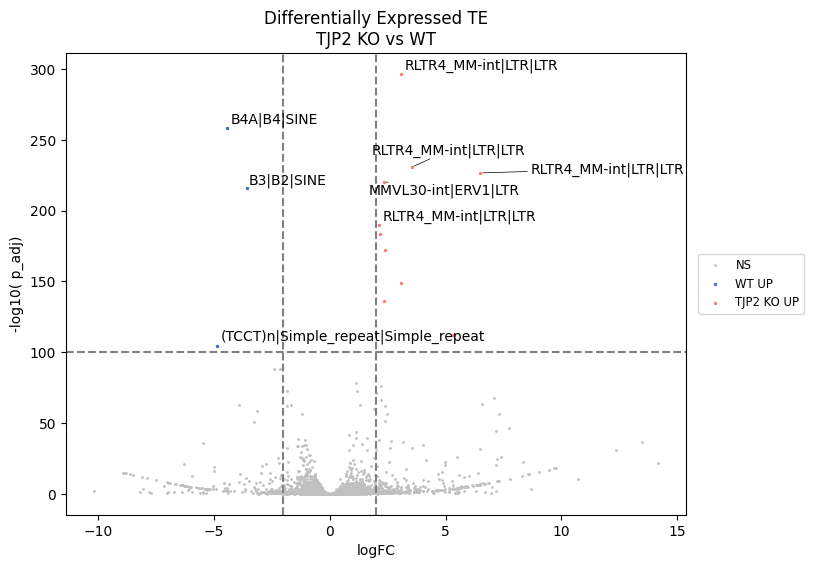

In [40]:
f1, a1 = zc_volcano.dge_vocano_plot( df = dge, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE\nTJP2 KO vs WT', 
                    up_lfc_thresh = 2, down_lfc_thresh = -2, pval_thresh = 1e-100, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 8, num_label_top_down = 8, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_fam_class' )

<font color = plum>Large LFC no label

/home/lucy/VU Basic Sciences Dropbox/Lucy Chen/turner_organoid_bulk_RNA_local/zc_volcano.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.sort_values( by = pval_col,  ascending = True, inplace=True)
/home/lucy/VU Basic Sciences Dropbox/Lucy Chen/turner_organoid_bulk_RNA_local/zc_volcano.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values( by = pval_col, ascending = True, inplace=True)


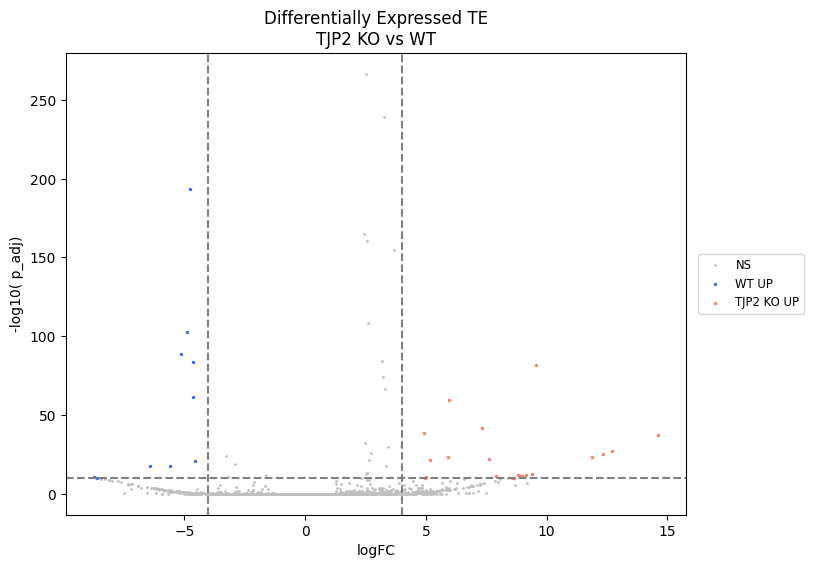

In [130]:
f1, a1 = zc_volcano.dge_vocano_plot( df = dge_te, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE\nTJP2 KO vs WT', 
                    up_lfc_thresh = 4, down_lfc_thresh = -4, pval_thresh = 1e-10, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 0, num_label_top_down = 0, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='TE_name' )

## Analysis for subFam level

### get volcano plots for subF dTE and dGenes

In [44]:
subf_dge.head()

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
0,(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
1,(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
2,(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
3,(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
4,(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


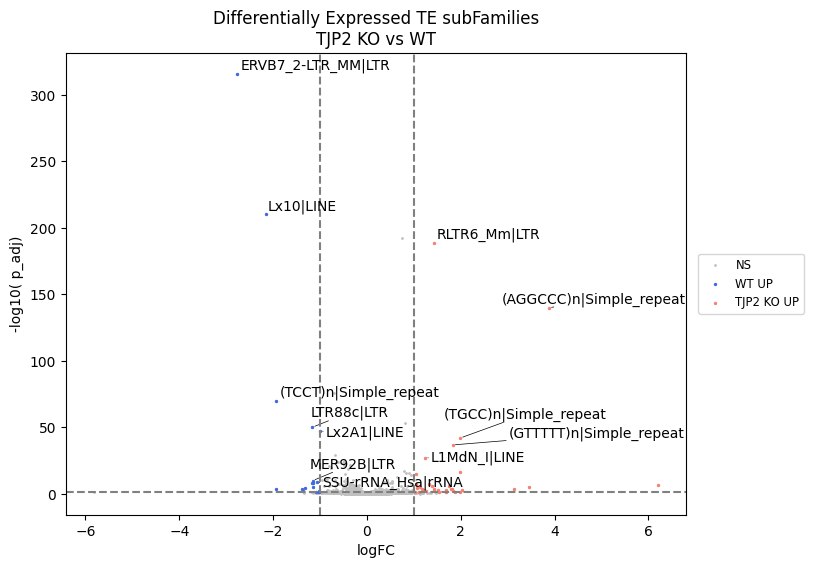

In [45]:
f1, a1 = zc_volcano.dge_vocano_plot( df = subf_dge, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE subFamilies\nTJP2 KO vs WT', 
                    up_lfc_thresh = 1, down_lfc_thresh = -1, pval_thresh = 0.05, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 8, num_label_top_down = 8, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_class' )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


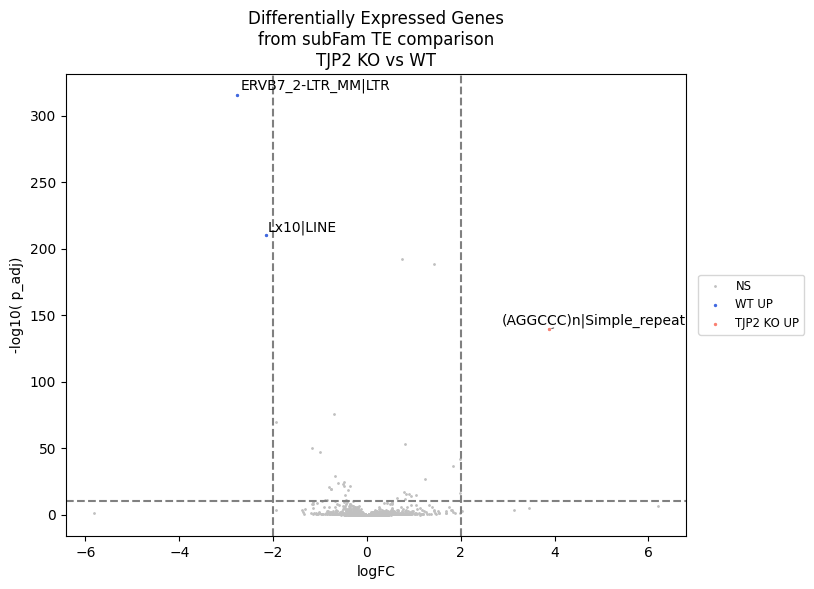

In [53]:
f1, a1 = zc_volcano.dge_vocano_plot( df = subf_dge, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed Genes\nfrom subFam TE comparison\nTJP2 KO vs WT', 
                    up_lfc_thresh = 2, down_lfc_thresh = -2, pval_thresh = 1e-10, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 10, num_label_top_down = 10, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_class' )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


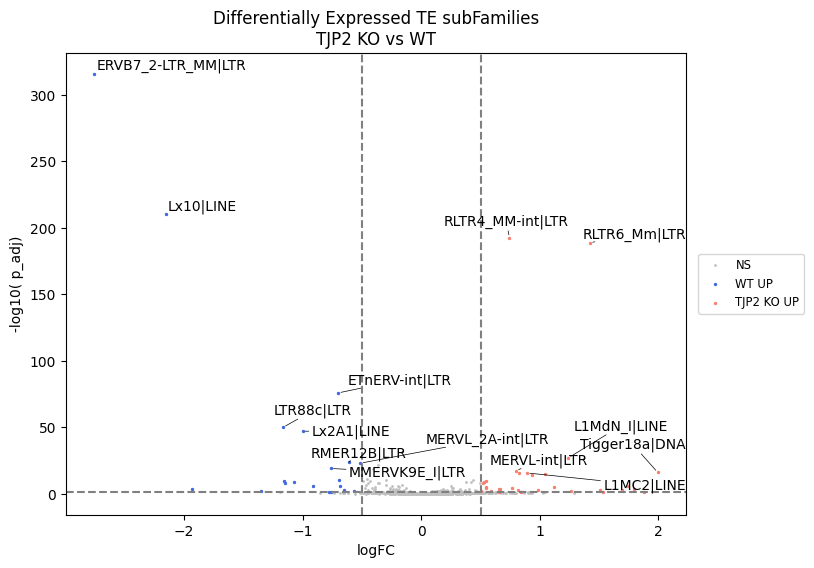

In [59]:

f1, a1 = zc_volcano.dge_vocano_plot( df = subf_dge_revelant, lfc_col = 'log2FoldChange', pval_col = 'padj', 
                                    title = 'Differentially Expressed TE subFamilies\nTJP2 KO vs WT', 
                    up_lfc_thresh = 0.5, down_lfc_thresh = -0.5, pval_thresh = 0.05, 
                    up_legend_lab = 'TJP2 KO UP', down_legend_lab = 'WT UP', ns_legend_lab = 'NS',
                    num_label_top_up = 8, num_label_top_down = 8, return_ax=True, show_fig = False, 
                    text_function = zc_volcano.text_top_significant, annotation_text_col='name_class' )

## calculate number of elements up or down regulated in each class

In [46]:
dge.head() #4, 1e-10

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
2,(A)n_17,72.183100,-0.273901,0.190399,-1.438564,0.150274,0.540315,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
3,(A)n_18,113.898323,-0.033522,0.146842,-0.228286,0.819424,0.954895,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
4,(A)n_19,184.535379,0.079692,0.117803,0.676481,0.498735,0.831150,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [48]:
dge_sig_up = dge[ (dge['padj'] <1e-10) & (dge['log2FoldChange'] >4) ] 
dge_sig_up.shape

(37, 12)

In [51]:
dge_sig_up.sort_values( by = 'padj').head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
170762,RLTR4_MM-int_69544,670.532619,6.489817,0.200087,32.435047,8.802553e-231,2.835830e-227,LTR,LTR,RLTR4_MM-int,RLTR4_MM-int|LTR,RLTR4_MM-int|LTR|LTR
3662,(AGGCCC)n_14,232.021239,5.310754,0.231589,22.931780,2.239845e-116,4.008826e-113,Simple_repeat,Simple_repeat,(AGGCCC)n,(AGGCCC)n|Simple_repeat,(AGGCCC)n|Simple_repeat|Simple_repeat
43313,IAPEz-int_28359,236.519197,7.112808,0.397189,17.907852,1.024130e-71,1.221976e-68,LTR,ERVK,IAPEz-int,IAPEz-int|ERVK,IAPEz-int|ERVK|LTR
170413,RLTR4_MM-int_28715,1238.079233,6.561646,0.378917,17.316836,3.511397e-67,3.900799e-64,LTR,LTR,RLTR4_MM-int,RLTR4_MM-int|LTR,RLTR4_MM-int|LTR|LTR
45655,IAPEz-int_6811,211.232117,7.297193,0.446441,16.345245,4.702761e-60,3.986951e-57,LTR,ERVK,IAPEz-int,IAPEz-int|ERVK,IAPEz-int|ERVK|LTR


In [53]:
pd.DataFrame( dge_sig_up[['repFamily', 'repClass']].value_counts() )

,,count
repFamily,repClass,
LTR,LTR,13
ERVK,LTR,9
Unknown,Unknown,4
ERV1,LTR,3
Simple_repeat,Simple_repeat,3
ERVL-MaLR,LTR,2
L1,LINE,2
hAT-Charlie,DNA,1


In [54]:
dge_sig_down = dge[ (dge['padj'] <1e-10) & (dge['log2FoldChange'] < -4) ] 
dge_sig_down.shape

(17, 12)

In [55]:
pd.DataFrame( dge_sig_down[['repFamily', 'repClass']].value_counts() )

,,count
repFamily,repClass,
ERVK,LTR,8
L1,LINE,3
Simple_repeat,Simple_repeat,2
B4,SINE,1
ERV1,LTR,1
ERVL-MaLR,LTR,1
LTR,LTR,1


In [56]:
subf_dge.head()

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
0,(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
1,(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
2,(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
3,(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
4,(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


In [61]:
subf_sig_up = subf_dge_revelant[ (subf_dge_revelant['padj'] <0.05) & (dge['log2FoldChange'] > 0.5) ] 
subf_sig_up.shape

(50, 10)

In [58]:
pd.DataFrame( subf_sig_up[['repFamily', 'repClass']].value_counts() )

,,count
repFamily,repClass,
ERVK,LTR,15
L1,LINE,8
ERV1,LTR,4
ERVL,LTR,4
ERVL-MaLR,LTR,4
hAT-Tip100,DNA,2
hAT-Charlie,DNA,2
Alu,SINE,1
L2,LINE,1


## save data